### Introduction to the notebook: Hypothesis testing and Central Limit Theorem
- For this notebook you don't need to know python you can just go through the text it will help in understanding the basics of hypothesis testing
- If you understand python you can download and execute individual segments
- Some codes are just for delivering the content and may never be required for topic of Hypothesis testing. I will make my best attempt to explain code segments which are relevant to the topic
<br> I have done this just to improve my understanding. Please point out any mistakes you observe it will really help in clarifying my understanding of the topic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
##We load the requisite repositories for running our codes

**What is hypothesis testing?** <br> Hypothesis testing is a statistical technique where you make mutually exclusive statements about the population and test which of these statements are true. These mutually exclusive statements are called **Null** and **Alternate** Hypothesis. 

**What is null and alternate hypothesis?** <br> These are essentially the claims you make about the population and end up testing. Null Hypothesis is also called status-quo or research hypothesis. Example in our case Null Hypothesis will be *Smoking Causes Cancer* or *New Medicine leads to lower sugar levels*. Alternate hypothesis by definition will be a mutually exclusive event *Smoking doesn't cause cancer* or *New medicine doesn't reduce sugar levels*. 

**Null hypothesis is represented as H0** and **Alternate hypothesis is represented by H1**

---

Some more statistical examples of hypothesis testing can be: <br>
a. Men are taller than women in general. **H0**: Average height of Men >= Average Height of Women **H1**: Average Height of Men < Average Height of Women
<br>b. Average number of stars in Galaxy is $10^{100}$ Stars. **H0**: Galaxy has $10^{100}$ Stars. **H1**: Galaxy doesn't have $10^{100}$ Stars. 
<br> *Simple enough? This will start getting technical soon.*

---
As you would've guessed first step in performing any hypothesis is creating a Null and Alternate Hypothesis. Null hypothesis can be of the following categories:

**a. Status Quo** - When you are trying to disprove a claim. (Say a smoker friend tells you Smoking doesn't cause cancer and you want to disprove the "status-quo" knowledge that smoking indeed causes cancer). 

**b. Researcher** - You have done some research and want to establish the veracity of the same. (Say you came up with a medicine which reduces blood sugar level and you want to prove it indeed does it)
<br>

**What is the need for hypothesis testing?**
We generally don't have access to the Population data and therefore saying anything with certainty is impossible about the population. For instance in two examples we took above:
> We will not have access to data of all smokers to establish the claim with certainty

> We will not be able to administer your test medicine to entire population. (May be not even to a single person)

Then how do we solve the above challenges? The answer is Hypothesis Testing. In this approach we take a sample which is representative of the population and do our tests and conclude if our hypothesis is true or not. 
How to do it? We will come to that soon, before that we need to understand some fundamentals about the hypothesis testing approach. 

### A simple example of Hypothesis Testing
Let us take a very simplified example of hypothesis testing. Say our friend Sujeet claims that he can predict an outcome of a coin toss. You being a believer in science and logic do not agree to his claim. So you start testing his claim.

You toss a coin and Sujeet ends up guessing the correct answer in $1^{st}$ guess. What do you think the probability of this is? <br> 
50%

Probability of correct $2^{nd}$ guess is (1/2)X(1/2) = 0.25.
<br> Probability of correct $n^{th}$ guess is $(1/2)^{n}$

<br> Probability graph for 20 successful guesses is given below:


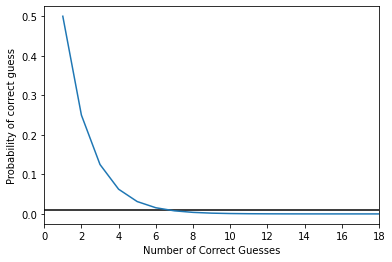

In [3]:
n = np.array(range(1,20,1)) #Range gives a list of integers between 1 & 20 with a gap of 1
k = (1/2)**n
ax = plt.subplot() #We create a pyplot object to display our graph
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability of correct guess")
plt.xlim(0,18)
plt.axhline(y = 0.01,color='black') #For having 0.01 probability of correct guess the number of guesses required is close to 7
plt.plot(n,k) #Here we plot n vs Probability
plt.show()

##What does this code do?
#This code generates a series of integers between 1 and 20 which are essentially the number of correct guesses and
#then we compute the probability associated with each integral guess in line 2 we are using list comprehension capabilities
#of python where when a scalar operation is used on a list entire list gets that scalar operation implemented
#Then we plot the graph of our data xlabel, ylabel, xlim & axhline are parameters of pyplot library used for plotting data

Now with each correct guess your doubt on Sujeet starts reducing. First guess you were sure (almost) that there is a 50% chance his claims were incorrect.
<br> With second, third, fourth etc your doubt starts dwindling. 
<br> Here your **Null Hypothesis is: Sujeeth's claim is wrong** and **Alternate Hypothesis is: Sujeet's claim is correct.**
<br> As he starts predicting the coin tosses, with $10^{th}$ guess the chance of anyone doing it correctly is 0.097%. 
<br> So your decision to question Sujeet's claim starts loosing its veracity with every correct guess and by $10^{th}$ guess the probability of Sujeet being able to predict all tosses correctly is so low that you start questioning your Null Hypothesis.
<br> This crude example shows how any of the Hypothesis tests work, you decide upon your belief - which is formulated in form of Null and Alternate Hypothesis (*these have to be mutually exclusive statements*) and then start testing with the data available and reject one of them basis the probability observed in the experiment. 

## Formalizing Hypothesis Testing
In this section we try to extend our basic idea of Hypothesis testing by formalizing the process for statistical testing. Before we do that we need to understand a few key topics:
 - Sample and Population Parameters
 - Central Limit Theorem
 - Sampling Techniques
 
### Sample and Population Parameters
Whenever we do a statistical test we want to be sure that it holds true for every-one (in general). Which essentially means we want to be sure that the computed result holds true for the entire population. For example if you want to test how many people like cheese burst pizza, you would want to do a survey for entire country and compute say 30% of people like cheese burst pizza. 
<br> However, that endeavour will be an extremely costly one even if you try to do an online survey. Therefore we generally try to take a sample which is representative of the population (in this case people who eat pizza) and calculate % of people who like cheese burst pizza. 
<br> As we increase the size of our sample our estimate of sample starts approaching population. 

**Question: Imagine you do a survey for 100 people and you get 30% people liking cheese burst against 200 people surveyed by your friend who gets a result of 45%. What will you attribute this difference to?**
1. Due to difference in the samples taken by you and your friend?
2. Due to people liking cheese burst increasing between your survey and your friend's survey?

### Central Limit Theorem
Central Limit Theorem (CLT) is essentially the most important statistical theorem. The ***style statement*** of CLT is:
<br>***Numbers extracted out of large number of random draws start following normal distribution***
<br> Let us take an example to demonstrate this. In a roll of dice the probability of getting a number from 1 - 6 is equal which is 1/6. Now if you have two dices and you try to tabulate number of combinations which can get you a particular sum say 2. As you would have guessed there is only one way to get a sum of 2 which is (1,1). 
<br> Similarly for 4 there are 3 possible outcomes (2,2), (1,3), (3,1). 
<br> The sum of outcome of two dices ranges between 2 & 12. We will write a code to create a frequency table and graph of number of cases against each outcome. 

[1 2 3 4 5 6]


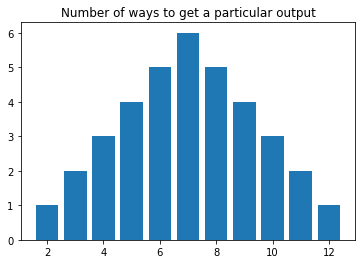

In [4]:
dice_output = np.array(range(1,7,1)) #Output possible from a single dice
print(dice_output) 
count_dict = {} #Creating a key value pair for each outcome
for i in range(2,13,1): #Our possible outcomes are between 1 & 12 (Python indexes on n-1 basis therefore for 12 outputs we use 13)
    val_test = [i]*6
    val_test = val_test - dice_output
    count = len(list(filter(lambda x: (x>0 and x<=6),val_test))) #Google lambda functions they are part of list comprehension
    count_dict[i] = count
counts = list(count_dict.keys())
values = count_dict.values()
plt.bar(counts,values)
plt.title("Number of ways to get a particular output")
plt.show()
#What does this code do?
#This code uses a simple algorithm to compute number of possible outcomes if we do a sum - values possible any number greater than 0 and less than 7
#is the number of possible counts.

In [5]:
def count(n,k,target):
    if n == 0:
        return 1 if (target == 0) else 0
    if target < 0 or k*n < target or n > target:
        return 0
    result = 0
    for i in range(1,k+1):
        result+=count(n-1,k,target - i)
    return result

As we can see with number of dice = 2 we saw a frequency curve which is symmetric. However, when we start increasing the number of iterations from 4 - 10 in below graphs the shape of graph becomes closer to bell curve. 
<br>**This is the fundamental premise of CLT as the number of random draws increases the frequency distribution starts approaching normal curve**

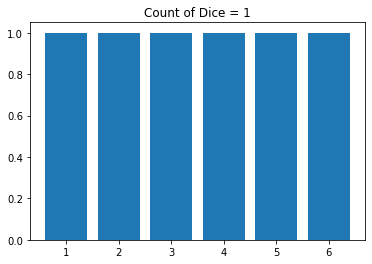

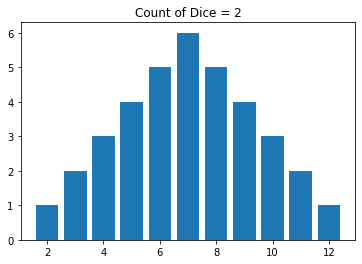

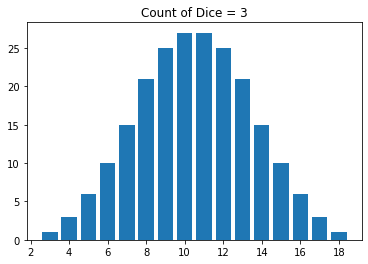

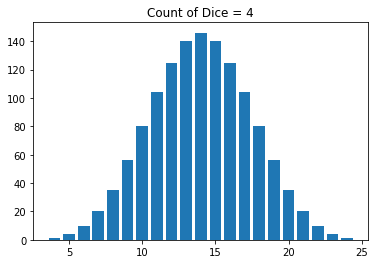

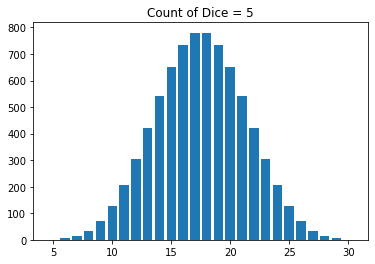

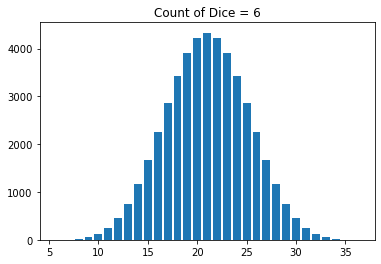

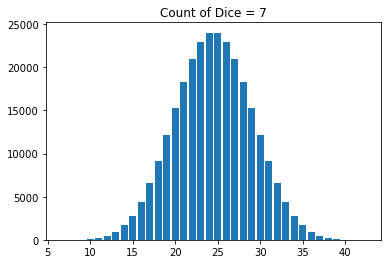

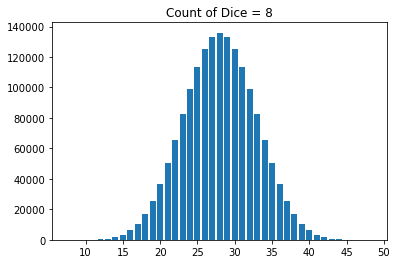

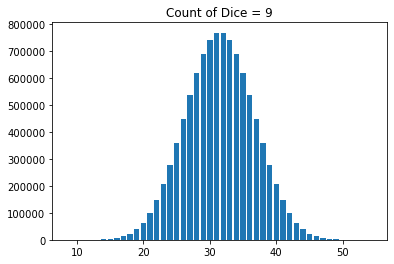

In [5]:
count_dict = {}

for n_dice in range(1,10):
    count_dict = {}
    for output in range(n_dice,6*n_dice+1):
        count_dict[output] = count(n_dice,6,output)
    plt.bar(list(count_dict.keys()),count_dict.values())
    plt.title(f"Count of Dice = {n_dice}")
    plt.show()
    

In [6]:
zeros = np.zeros(1000000)
ones = np.ones(10000)
comb = np.concatenate((zeros,ones))
prop = []
for i in range(1,10000):
    prop.append(sum(np.random.choice(comb,1000))/1000)
    

Text(0.5, 1.0, 'Distribution of proportions of 1s in random samples')

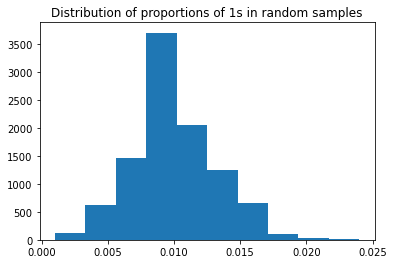

In [7]:
plt.hist(prop)
plt.title("Distribution of proportions of 1s in random samples")

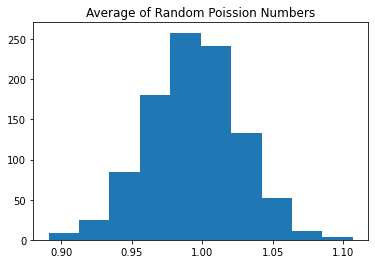

In [8]:
a = np.random.poisson(lam = 1, size=100000)
rand_sum = []
for i in range(1,1000):
    rand_sum.append((np.random.choice(a,1000).mean()))
plt.hist(rand_sum)
plt.title("Average of Random Poission Numbers")
plt.show()

We start with 1 dice the distribution is **Uniform** as we increase the number of dice the distribution starts approaching **Normal**. Thus we have devised a normal distribution from a seemingly uniform distribution and this is the fundamental premise of CLT.
<br> Formalizing the same we can say if a 
<br> *Random variable follows any distribution (Poission, Uniform, or any other) if we do n trials X1, X2, X3 .... Xn as n increases the 
<br> sum S = X1 + X2 + X3 + X4 + .... Xn starts approaching Normal Distribution.*
Which we just proved in the demonstration of dice throw above. 
<br> Given we have proved S = $X_{1}$ + $X_{2}$ + $X_{3}$ + ...+ $X_{n}$ is normally distributed =>  $\frac{1}{n}$  ($X_{1}$ + $X_{2}$ + $X_{3}$ + ...+ $X_{n}$) should also be normally distributed and that is one of the core principles we will be using in Hypothesis Testing. 

This is the first postulate of Central Limit Theorem. There is **one more important result** of CLT which we will cover soon. 

### Sampling Techniques
In previous sections we got introduced to CLT and Sample & Population Parameters. In this section we will very briefly cover the sampling techniques. As we know sampling is required to provide a ***representative*** picture of the population, a pertinent question to ask is how to do sampling. Some of the commonly known sampling techniques are:
1. Random Sampling - Where samples are chosen randomly from the desired population
2. Systematic Sampling - Where we choose every $n^{th}$ element from the population
3. Cluster Sampling - Where we create clusters of possible population sets and choose elements randomly from there
4. Stratified Sampling - We sub-divide the population into stratas (eg. Demographics) and choose samples from these stratas

### Second important Result of Hypothesis Test
Now that we have covered Sampling techniques in brief we will cover next important postulate of CLT, which helps in formalizing the hypothesis testing frameworks and also gives the mathematical background to the test statistics. 
In one line this important postulate of CLT states:
<br> **The mean of samples extracted from any population has a Normal Distribution with mean = Population Mean and Standard Deviation = $\sigma/ \sqrt n$ , where $\sigma$ is the population standard deviation**

There is a lot of mathematical background behind this statement which we will not cover here, you can refer to other notebook (WIP) for that requirement. However, for our further section on Test Statistics and Hypothesis testing this much theoritcal background should suffice. 

### Various type of test statistics
In this section we will cover main type of test-statistics which can be used for various scenarios. Main test-statistics which we will be covering are:
- Z test
- Chi-Square Test
- T test
- ANOVA
- Linear Regression

#### Z Test
Z tests are used whenever the variable we are testing is normally distributed (***Note: Here the population doesn't have to be distributed normally, we are talking about test-statistics which as per our previous discussion is indeed normally distributed as per CLT***).
<br> A little bit of recap will help. 
<br> **NULL HYPOTHESIS** ($H_{0}$): Status Quo or Research Test
<br> **ALTERNATE HYPOTHESIS** ($H_{1}$): Mutually exclusive event against $H_{0}$

Taking an example here: 
<br>$H_{0}$: Does eating apple a day doesn't keep the doctor away (status quo)
<br>$H_{1}$: Eating an apple every day keeps the doctor away 
<br> Excuse my sense of humor for adding this hypothesis. Hope this helps you remember null and alternate better.

Another thing which you can think: Say a company is launching a new gaming mouse and it increases your performance in a game significantly. (Measure of performance of game is say your score). Let $\mu$ be the average increase in score. 
<br>Then Null Hypothesis will be: $\mu$ = 0 (i.e no change in the score after using the mouse)

What we essentially do is
- Formulate the Null and Alternate Hypothesis
- Calculate data from Samples
- Measure Statistics (In this step you are trying to answer the question **If null hypotheis were true how extreme is my sample** if too extreme you reject null if not you do not reject null. - more on this in subsequent sections

To take an example say you take two samples for people eating an apple and compute average number of days without visiting the doctor:
- **Sample 1** - Number of days without going to doctor 10
- **Sample 2** - Number of days without going to doctor 360
Obviously our sample 2 is extreme enough to say Null is incorrect. 
<br> Similarly in our first example after 10 correct guesses we were in a position to doubt/ reject our null hypothesis of Sujeet's correct guesses are merely due to luck. 

##### Impact of Sample Size
While there is one factor of the quantum of the distance between actual value and measured value. There is one more factor how large the sample is. Say a sample with 2 people who haven't gone to doctor for 360 days v/s Sample with 100 people who have not gone to the doctor, sample with 100 people supports our rejection of null hypothesis more strongly. 

Given this knowledge we formalize the test statistics:

$\large Z = \frac{(\bar x - \mu)}{\frac{\sigma}{\sqrt{n}}}$

- $\bar x$ is the Sample mean
- $\mu$ is the population mean against which we are testing
- $\sigma$ is the population variance which we assume we know
- n is the number of items in Sample

To take a numerical example say we are testing average height of males in cms to be 176.5. So our formalization of Hypothesis will be:
<br>$H_{0}$: $\large \mu = 176.5$ 
<br>$H_{1}$: $\large \mu \neq 176.5$

<br> If we take a sample of say 100 men and the average height of these people is say 213 cms (Mostly men from Netherlands: Netherlands has the tallest people in the world on an average with average male height 183 cms and female height 169 cms). And we know standard deviation for population is 6.35 cms. 
<br>Then:
- $\large \bar X = 213 $ 
- $\large n = 100$
- $\large \sigma = 6.35$

For sample of 100 and knowing 7 Feet is kind of extreme height we might be in a position to reject the null hypothesis. 
<br> While this might make sense in this example or in case of Sujeet's guessing game example where we know probability of observing this extreme is low. However, in order to formalize our argument we need some more mathematical tools which we will cover now. 

*Note* Expression for Z above increases in value as n increases and also increases in value if the distance between $\bar x$ and $\mu$ increases. Which means it has the potential to give extreme values if the Null Hypothesis is not supported by the sample.
<br> How do we define *what is extreme?* *what is not extreme enough?* fort this we will need one more tool called **P-Values** before jumping into the concept of P-value we will have a brief discussion about what exactly does a normal curve measure.

### Z Value and Z Curve 
Z Curve is a symmetric curve. Every normal distribution will have a symmetrical shape around the mean, in order to achieve easier calculation (Not required with current computers) we convert the normal curves into Z-Curve which have a $\large \mu = 0$ and $\large \sigma = 1$.
<br> Therefore the form of conversion is: $\large \frac {(\bar X - \mu)}{\sigma}$

In [9]:
print(norm.cdf(0,0,1))

0.5


Let us understand the code above. 
- We are creating x-values which will be used to compute the probability of that particular point happening in the data
- Next we compute mean and std of the distribution we will use same STD and MEAN of the data
- We use PDF of normal distribution to compute the probability 
    - PDF of a Normal Distribution is given as $ \large f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^\frac{-(x-\mu)^2}{2\sigma^2}$
- This PDF computes probability of x taking a particular value given $\mu$ and $\sigma$
<br>**Note**: In case of continuous distributions $\large f(X=x)$ does not make sense we generally calculate PDFs in a range. Meaning a continuous probability distributions do not take a particular value they are relevant over a range of values. 
<br> To compute say a Normal distribution taking a value $\leq$ a particular value is given by the CDF (Cumulative Distribution Function). 
<br> Example: If we want to compute what is probability of a Standard Normal variable taking value $\leq$ 0. This doesn't require you to compute anything as we can see from the graph Standard Normal curve is symmetric about mean (Zero in this case) and total area under normal curve is 1. Means the probability of a normal curve taking value $\leq$ 0 is 50%. 
<br> Which we computed using ```norm.cdf(0,0,1)``` where 0 is the value for which we are computing probability second 0 is the mean of the distribution and 1 is the standard deviation. 
<br> In order to compute probability value between two x values i.e say we want to know what is the probability x will take value between 2 and 0, will be given by ```norm.cdf(2,0,1) - norm.cdf(0,0,1)``` which is around 48%. 

<br> Below is the standard representation of the Normal Distribution. 
<br> Similarly in-order to compute Z-Value which correspond to a given probability ($-\infty $ to Z) is given by ```norm.ppf(Probability, Mean, Std)```.

**Note:** Normal curve extends till infinitely at both end so P($-\infty$ to $\infty) = 1$


<img src="Screenshot%202022-03-10%20175554.png" width="600">

In [10]:
norm.cdf(2,0,1) - norm.cdf(0,0,1) ##Computing proability value between 0 and 2
norm.ppf(0.95)

1.6448536269514722

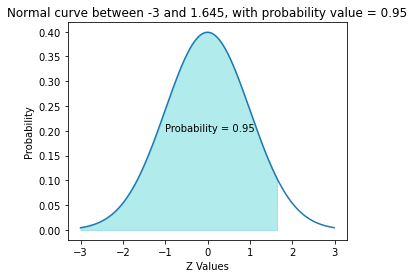

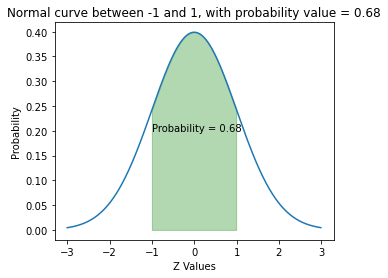

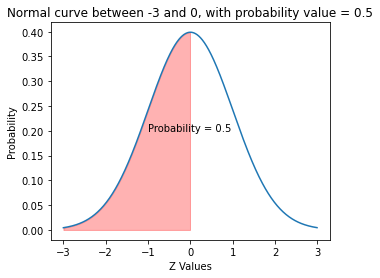

In [17]:
def plot_normal(x_min,x_max):
    mu = 0
    sigma = 1
    color = ['b','r','g','c','m','y','k']
    x_axis = np.arange(mu - 3*sigma ,mu+3*sigma,0.01)
    fill_area = np.arange(x_min,x_max,0.01)
    fill_pdf = norm.pdf(fill_area,0,1)
    mean = x_axis.mean()
    std = x_axis.std()
    pdf_x_axis = norm.pdf(x_axis,0,1)
    fig,ax = plt.subplots(figsize = (5,4))
    ax.fill_between(fill_area,fill_pdf,0,alpha = 0.3,color = np.random.choice(color))
    plt.title(f"Normal curve between {np.round(x_min,3)} and {np.round(x_max,3)}, with probability value = {np.round(norm.cdf(x_max)-norm.cdf(x_min),2)}")
    plt.plot(x_axis, pdf_x_axis)
    #plt.text(3,2,"Hello")
    plt.xlabel("Z Values")
    plt.ylabel("Probability")
    ax.annotate(f"Probability = {np.round(norm.cdf(x_max)-norm.cdf(x_min),2)}",(-1,+0.2),color='black',size = 10)
    plt.show()

plot_normal(-3,norm.ppf(0.95)) ##Probability curve for 95% probability left tailed
plot_normal(-1,1) ##Probability curve between -1 and 1
plot_normal(-3,0) ##Probability curve between min and 0
#As we have plotted this curve with mean = 0 and std = 1 means this is also a standard normal distribution. 
#This curve gives the CDF of 95% means the value <=1.64 = 95%
#In second plot we have plotted area between -1 to +1

#### P-Value introduced
Here we introduce you to one more important concept called p-Value. But, before introducing it formally let us understand it more informally. In our coin-toss example when the values started getting too extreme we started rejecting our Null Hypothesis. Similarly for a Z-Test when values are too extreme we start rejecting the Null Hypothesis. 

<img src="Rejection_null.png" width="400">

<br> Here we try to find our Z-Statistics and identify if it falls in any of the rejection regions.
- For two tailed test if our acceptance level $\alpha$ = 5% then our rejection region is 2.5% on both ends
- For one tailed (Left or Right) if our acceptance level $\alpha$ = 5% then our rejection region is 5% on either side depending on the test

Now we are formally in the position to formulate our Null Hypothesis & Alternate Hypothesis and therefore test the same for a given sample. Before that a small recap:
- Z Test is done when we assume we know the population variance
- Standard Error in sample is given by $\frac{\sigma}{\sqrt{n}}$
- Basis CLT the mean values are normally distributed with mean = $\mu$ and standard deviation = $\large \frac{\sigma}{\sqrt{n}}$
- Test statistics is given by $\large Z = \frac{(\bar x - \mu)}{\frac{\sigma}{\sqrt{n}}}$
- We reject Null Hypothesis when it falls in the Rejection region based on one-tailed or two-tailed tests
    - For two-tail our rejection region is $\frac{1}{2}$ of the original rejection region
- Some of the critical formulas for python are ```norm.cdf(X,mu, sigma)``` to compute probability ```norm.ppf(p,mu,sigma)``` to compute Z value corresponding to the probability p, with population mean = mu and population standard deviation = sigma

**One thing to note here is we are not assuming the population distribution anywhere, we are assuming distribution of Sample mean $\mu$ which is normally distributed with mean = $\mu$ and variance as $\large \frac{\sigma}{\sqrt{n}}$

We will cover 2 examples of Z-Test here:
- Simple example where we compute $\mu$ value against the sample mean
- Population test from a data set

#### Examples of Z-Test
Here we attempt to solve a couple of questions. We will try to use python to compute all the values, some essential libraries required for this exercise are loaded in the beginning. Code Segments till now were not critical in understanding hypothesis testing. However, the code segment in this section is **very important** so if you have any queries:
- Post the query in the WhatsApp group 
- Post it in the comments section I would try to come back
- Google most of the answers should be easily available

##### Simple example with hypothetical values:
Let us come to the height example we took. So our sample had an average height of 213 cms and we are testing against population mean of 163 cms (Which by the way is the average male height). Our population standard deviataion is 6.35 cms. Our hypothesis parameters will be:
- $H_{0}$ = 163 cms
- $H_{1}$ $\neq$ 163 cms

Other parameters are:
- $\sigma$ = 6.35 cms
- n = 100
- $\bar X$ = 213


78.74


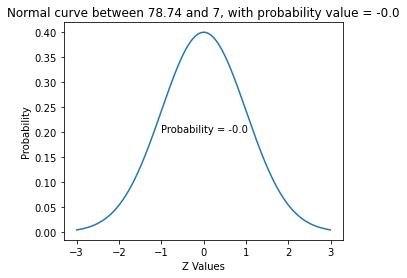

In [22]:
mu = 163
x_bar = 213
sigma = 6.35
n = 100
test_statistics = (x_bar-mu)/(sigma/math.sqrt(n)) 
print(np.round(test_statistics,2))
#If we try to plot this data on the normal plot we get following:
plot_normal(test_statistics,7) ##Plotting of the data is just for visualization we can work with Test Statistic value alone
##Let us discuss our results in detail


##### Discussion of Height Example
As we saw our Z-statistics (also called test statistics) came out to be 78.74, now this is a huge value compare with previous examples for 5% of the curve our Z value was 1.645 which means if Test statistics was more than 1.645 we could reject null hypothesis with 95% probability. Or in other words if Z-statistics was above 1.645 we can say that the sample is extreme enough to reject the $H_{0}$.
<br>In our case the Z-value came out to be ***too extreme !!!***. First let us understand the logical premise behind this and see why that might happen:
- Our population average height was 163 cms (This is average human height)
- Our sample comprised of people having height of 213 cms i.e 7 Feet (How many people you have seen in life who have had height of 7 feet)

<br>This means that the sample indeed is pretty extreme to be treated as normal human height (either our sample comprises of only very tall people or not human at all). 
In nut-shell in this case we **would reject the null hypothesis at any significant value** because our Z-statistics is greater than critical value for 5% which is 1.645 or % which is 2.33. 

##### Example 2 for hypothesis testing:
Say we have data for height 25 people jumped. We want to estimate if an average person can jump more than 80 cms. Another data point we will require here is say the population standard deviation is 11 cms. (Note: We have assumed the variance here, generally population variance/ standard deviation are unknown. We will come back to the case in our t-test discussion). For now we can move ahead with the current set of assumptions:
- Data is set of 25 people
- $\mu$ = 80 cms
- n = 25
- $\sigma$ = 11 cms
<br>Our hypothesis are:
<br> $H_{0}$: $\mu$ = 80 cms
<br> $H_{1}$: $\mu \neq$ 80 cms

This being a two tailed test for 5% significance level we have Z-value between ```norm.ppf(0.025,0,1) and norm.ppf(1-0.025,0,1)```
<br> Whereas for 1% significance level we have Z-value between ```norm.ppf(0.005,0,1) and norm.ppf(0.005,0,1)```

**Test**

Number of elements in our sample are 25
Mean of the sample xbar is 83.84 cms
Standard deviation of the data is 10 cms
Value of Test statistics is 1.7469090909090954
For 5% significant test Statistics should lie between -1.96 and 1.96


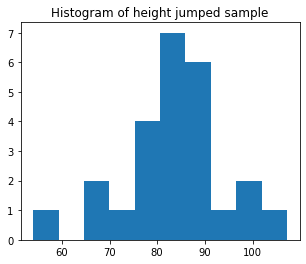

In [4]:
height_jumped = [80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01]
x_bar = np.mean(height_jumped)
sigma = 11
n = 25
mu = 80
print(f"Number of elements in our sample are {len(height_jumped)}")
print(f"Mean of the sample xbar is {np.round(np.mean(height_jumped),2)} cms")
print("Standard deviation of the data is 10 cms")
test_statistics = (x_bar-mu)/(sigma/math.sqrt(n))
print(f"Value of Test statistics is {test_statistics}")
##Z Values for 5% significance
print(f"For 5% significant test Statistics should lie between {np.round(norm.ppf(0.025,0,1),3)} and {np.round(norm.ppf(1-0.025,0,1),3)}")
##Our test statistics indeed lies between 
fig,ax = plt.subplots(figsize = (5,4))
plt.hist(height_jumped)
plt.title("Histogram of height jumped sample")
plt.show()

<img src="Z_Test.png" width="400">.
<br>Here we can see that our Z statistics is not getting into the rejection region and therefore we can conclude that the average height which a person can jump is actually 80 cms. 
<br> *We Do not reject Null Hypothesis*
<br> As is evident from the histogram also the average height is hovering around 80 cms except for a few outliers. 
<br> **This completes our discussion on Z-Test we will introduce p-value concept subsequently before moving to other types of tests**

#### An introduction to the concept of p-value
In the previous section we computed the Z-statistics value and checked if the value falls within our acceptance region - to accept the Null Hypothesis, if outside we reject the Null Hypothesis. 
P-Value is the probability of seeing an event similar to the event we are seeing given the null hypothesis. For example:
- Probability of having a sample with average height = 213 cms given average height of a person is 163 cms
- Probability of having a sample of height jumped given, a average human can jump 80 cms
<br> Based on these probabilities we decide if the Null Hypothesis is to be rejected. 
- In first case Probability is Zero => Given the average height = 163 cms there is almost zero probability of finding a sample with average height = 213 cms
- In second case Probability is ```1-norm.cdf(test_statistics)``` finding the sample we used given an average human can jump 80 cms

<br> Now one thing to remember here is we cannot reject the sample (unless our hypothesis is a known fact like ***Earth takes 365.25 days to revolve around the Sun***). Though we can choose to collect more data if the hypothesis test doesn't make sense like in case 1 where we had to reject the hypothesis the average height should not be 163 cms (but rather a lot higher). 

One thing to note here is that p-value computation will depend on the test being two tailed or one tailed. 
- For two tailed test we have significance level = $\large \frac{significance level}{2}$
- For one tailed test significance level stays the same
- If P_Value < Significance Level we reject the Null Hypothesis otherwise we do not reject Null Hypothesis 

In [83]:
##In both the examples above we compute the test statistics:
#CASE 1
print(1-norm.cdf(78.74,0,1))
#This being two tailed test with significance level = 5% the actual significance level becomes 2.5%
#P-value is 0 and Significance Level = 2.5% P_Value < Significance Level => We reject Null Hypothesis
#Almost 0 Probability 

#CASE 2
print(f"P_VALUE for Two tailed test: {np.round(1-norm.cdf(1.74691,0,1),2):.0%}")
##In this case as our significance level is 5% and half of which will 2.5% and our p-value of 4% is higher than


0.0
P_VALUE for Two tailed test: 4%


There is a lot of literature on P-Values. However, for now this much introduction into the P-Value should be sufficient. One more concept which might come handy is Error. In hypothesis testing there are two types of errors:
- **Type 1 Error** - Probability of rejecting Null hypothesis when it is actually true (In our jump example if we change the value of sigma from 11 to 9 the test-statistics will become 2.32 and at 95% we will reject the null. So essentially if we got some values which were higher than mean and with lower variance we will reject null). This probability is defined by the significance value of our test i.e $\alpha$, we reject null hypothesis with this probability.
- **Type 2 Error** - Which is probability of accepting Null when it is actually false. This is termed as $\beta$. 
We will take a small example for computation of power of test and how various parameters impact the power. Let us use our jumping example. 
<br>To reiterate:
<br> $\mu$ = 80 cms
<br> $\sigma$ = 11 cms
<br> $\bar {X}$ = 83.84
<br> $\alpha$ = 0.05

<br> The Type 1 Error is very simple it is equal to $\alpha$ = 0.05
<br> For Type II Error we have to compute the power of the test and $\beta$ = 1 - Power of the test

To compute power of the test we want to find out what is the probability of rejecting $H_0$ when $H_0$ is false (which is also known as the power of the test). Then we subtract this value from 1 to find out accepting $H_0$ when $H_0$ is false. 
<br> $P(Reject H_0 | H_0 is false)$ - Is the Power of Test ($\beta$)
<br> Type II error = $P(Accept H_0| H_0 is false)$ = 1 -$\beta$ 

<br>Here our $H_0$: $\mu$ = 80 & $H_1$: $\mu \geq$ 80 (We have changed the hypothesis a bit to create right tailed test)

<img src="Type II Error.png" width="400">.
<br> Visual Representation of T-II Error

In [15]:
height_jumped = [80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01]
x_bar = np.mean(height_jumped)
sigma = 11
n = 25
mu = 80
print(f"Number of elements in our sample are {len(height_jumped)}")
print(f"Mean of the sample xbar is {np.round(np.mean(height_jumped),2)} cms")
print("Standard deviation of the data is 10 cms")
test_statistics = (x_bar-mu)/(sigma/math.sqrt(n))
print(f"Value of Test statistics is {test_statistics}")
print(f"P_VALUE for Two tailed test: {np.round(1-norm.cdf(test_statistics,0,1),2):.0%}")
#This being a one-tailed test we reject the null hypothesis because p-value is lower than 5%
print(f"The value of Alpha or Type I error is: 5%")
#To compute type II error or power of the test we assume alternate hypothesis to be say 82. Now mu = 82 becomes our new Null
#We compute probability of (new mean = 82 given we have ascertained mean > 80). We reject H0 at 5% range is computed below
rejection_range = 80+(sigma/math.sqrt(n))*norm.ppf(1-0.05,0,1)
print(np.round(rejection_range,2))
##We reject H0 whenver the value of Xbar is > 83.62. Means we accept H0 whenever Xbar < 83.62. Now we have to compute what
##is the probability of actual value being = 82 and Xbar falling below 83.62
t_stat_new = (rejection_range - 82)/(sigma/math.sqrt(n))
print(t_stat_new)
#Remember we are trying to do a lower tail computation here means probability of Xbar below 83.62 (Accept H0) 
#but it is actually false ie mu = 82
prob_t2 = norm.ppf(t_stat_new,0,1)
print(prob_t2)

Number of elements in our sample are 25
Mean of the sample xbar is 83.84 cms
Standard deviation of the data is 10 cms
Value of Test statistics is 1.7469090909090954
P_VALUE for Two tailed test: 4%
The value of Alpha or Type I error is: 5%
83.62
0.7357627178605629
0.6303363208267873


***This closes our section on Z-Test***. What we have learned till now:
- What is hypothesis testing
- Central Limit Theoram
- Z-Statistics
- P-Values
- Type I and Type II Error

<br> Sections till now might have seemed slow mainly due to theoretical background required. Recap if you haven't understood anything. Because a lot of theory that we built will be used heavily in subsequent sections. 
Now we will be covering:
- T-Test
- Chi-Square Test
- Introduction of ANOVA
- Linear Regression

#### Examples of Hypothesis Tests
**Example 1**: Ramesh can run 100 meters in 16.43 seconds on average with a standard deviation of 0.8 seconds. He purchased new pair of shoes and thinks he should be able to run faster than his regular speed. He did 15 laps of 100 meters each and his average time came out to be 16 seconds. Perform hypothesis test at 5% confidence to check if his running time has indeed improved? 
**Solution 1**:
<br>Here: $\bar{X}$ = 16 $\mu$ = 16.43 and s = 0.8, $\alpha$ = 0.05 & n = 15.
We do not know the sample standard deviation so we use a t-test.
<br>Our t-Statistics  = $\large \frac{\bar{X}-\mu}{s/\sqrt{n}}$. Let us solve using python.
<br>$H_{0}$: $\mu \geq$16 & $H_{1}$: $\mu$<16 
<br>This is a left tailed-test

In [5]:
import numpy as np
import math
from scipy import stats
#Example 1 Solution
x_bar = 16
mu = 16.43
s = 0.8
n = 15
t_stat = (x_bar-mu)/(s/math.sqrt(n))
print(t_stat)
print(stats.t.ppf(0.05,n-1)) ##PPF To find the point at 5% Probability
print(stats.t.cdf(t_stat,n-1)) ##CDF to compute the value of probability of finding value below t-stat

-2.081728548586485
-1.7613101357748564
0.028099370183143364


Given our t-stat is lower than the requisite level for 5% or the CDF under our t-stat is lower than 5% means we reject the null hypothesis. Implying the shoes actually improve Ramesh's performance.


**Example 2**: Manish has started a new job as a call center agent. During his probation he is expected to clock 100 minutes of customer calls in a day. Manish's supervisor take data for last 16 days and the average comes out to be 108 minutes with standard deviation of 12 minutes. Has Manish met company's requirement?
**Solution 2**:
<br>Here $H_0: \mu \leq 100$ and $H_1: \mu > 100$
<br>$\bar{X} = 108$; s = 12; n = 16
<br>Test statistics = $\large \frac{\bar{X}-\mu}{s/\sqrt{n}}$
<br>Given the population standard deviation is not give and sample size $\leq$ 30 $\to$ We will use t-test

In [7]:
mu = 100
x_bar = 108
s = 12
n = 16
t_statistics = (x_bar-mu)/(s/math.sqrt(n))
print(t_statistics)
print(stats.t.ppf(1-0.05,n-1))
print(stats.t.cdf(t_stat,n-1))

2.6666666666666665
1.7530503556925547
0.027454140554840595


As the p-value here is <0.05 (last result) also the value of t-stat required for 5% is lower than our derived t-stat means we can reject null-hypothesis and conclude Manish has actually met the company's requirement. 

In [13]:
#Some sample computation you can ignore this:
mu = 8
n = 35
x_bar = 7.91
s = math.sqrt(0.03)
t_statistics = (x_bar-mu)/(s/math.sqrt(n))
print(t_statistics)
print(stats.norm.ppf(0.025))
print(stats.norm.cdf(t_statistics))

-3.0740852297878747
-1.9599639845400545
0.0010557455033353166


#### Population Proportion Test
One more area where Z test becomes relevant is population proportion. Population proportion follows binomial distribution and under CLT the point-estimate (average) starts following normal distribution.
Test statistics here will be:
<br> $\large \frac{\bar{p}-p_0}{\sqrt{\frac{p_0 \times q_0}{n}}}$
<br>Where $p_0 and q_0$ are the original population proportion and 1 - population proportion respectively.
<br>Let us understand this with an example:

**Example 3**: A pizza company believes 50% of the customers like to order coke with their pizza orders. In order to test the hypothesis they take a sample of 100 customers and see that 53% of the customers ordered coke along with the order, test the hypothesis of pizza company at 5% significance level. 
<br>Here $\bar{X}$ = 53; $\mu$ = 50; n = 100
<br>Our test statistics = $\large \frac{\bar{p}-p_0}{\sqrt{\frac{p_0 \times q_0}{n}}}$ where $p_0$ = 50 and $q_0$=50.
<br>$H_0$: $\mu = 50$ & $H_1 = \mu \neq 50 \to$ This is a two tailed test

In [18]:
p_bar = 53
p_0 = 50
q_0 = 100 - p_0
n = 100
z_statistics = (p_bar-p_0)/math.sqrt(p_0*q_0/n)
print(z_statistics)
print(1-stats.norm.cdf(z_statistics))
print(stats.norm.ppf(1-0.025))
#The p value is larger than 2.5% and the z statistics is lower than the value required for 2.5% therefore we cannot reject null.

0.6
0.27425311775007355
1.959963984540054


#### Comparison of two-populations
Another form of test which we typically use is to test for the differences between two populations. There are two type of paired-comparisons:
1. Matched Pairs (We generally do a comparison of Means here)
2. Independent Populations (We generally do a comparison of Means and Proportions here).

Here again CLT comes to our rescue because immaterial of the Population Distributions the sampling distribution in this case $\bar{X} - \bar{Y}$ are normally distributed. 

<img src="Sample_Dist.JPEG" width="400">.

##### Test for independent populations (When the population variances are different)
<br>We are trying to capture the difference between $\bar {X_1}$ and $\bar {X_2}$. So our value becomes $\bar{X} - \bar{Y}$.
<br>Standard error of this distribution is given by s = $\large \sqrt {\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$
<br>This is a t-test when $n_1 + n_2 \le 30$ other-wise normal test can be used. 
<br>Degree of freedom for t-test is given by $\large \frac {(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)}{n_1-1}+\frac{(s_2^2/n_2)}{n_2-1}}$. Woah!! That is a complex formula but it can be simplified if each $n_1$ and $n_2$ are $\geq$ 30 then we can use $n_1+n_2-1$ as the DOF. However, this gets redundant because then we can anyway use Z-test as per our previous statement. 

Let us take an example of comparison of two means:
<br>**Example 3** 
<br>Let us assume there are two classes being taught by two different set of teachers let us call them A and B. We want to see if there is any significant difference between performance of the classes therefore the quality of the teachers. Data pertaining to these classes is given below:
<br>***CLASS A***: Number of students taken: 09, Average CGPA on scale of 5: 2.0, Standard Deviation of CGPA: 0.866
<br>***CLASS B***: Number of students taken: 16, Average CGPA on scale of 5: 3.2, Standard Deviation of CGPA: 1.000
<br>We formalize this in form of variables for two tests as follows:
<br> $X_1$ = 2.0, $s_1$ = 0.866 and  $n_1$ = 9
<br> $X_2$ = 3.2, $s_2$ = 1.000 and $n_2$ = 16
<br>Also, these are independent populations (performance of one class doesn't impact the performance of other class). We do not have population means and the sample sizes are < 30 therefore we cannot use Z-Test and will have to use t-test.
<br> Our Test Statistics is:
$\large \frac{\bar{X_1} - \bar{X_2}}{\sqrt {\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$
<br>Degree of freedom is: $\large \frac {(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1-1}+\frac{(s_2^2/n_2)^2}{n_2-1}}$

<br> Our hypothesis test here is $H-0$ = $\mu_1$ = $\mu_2$ or $H_0$: $\mu_1 - \mu_2$ = 0.
<br> Similarly alternate hypothesis $H_1$ = $\mu_1 - \mu_2 \neq 0$
<br> Therefore this becomes a two-tailed t-test
Let us solve each one of them in python.

In [12]:
import math
import numpy as np
from scipy import stats
X_1 = 2.0
X_2 = 3.2
s_1 = 0.866
s_2 = 1.00
n_1 = 9
n_2 = 16
dof = (s_1**2/n_1 + s_2**2/n_2)**2/((s_1**2/n_1)**2/(n_1-1) + (s_2**2/n_2)**2/(n_2-1))
t_statistics = (X_1-X_2)/(math.sqrt(s_1**2/n_1 + s_2**2/n_2))
print(t_statistics)
print(dof)
#We round up the degrees of freedom to arrive at 19
print(stats.t.ppf(0.025,np.round(dof,0)))

-3.1423902922865476
18.84659125336577
-2.0930240544082634


**EXAMPLE 4**: Two laptop companies claim that their laptops last longer before requiring any repair. A sample of 11 laptops from company A lasted average of 4 years with standard deviation of 1.5 years and 9 laptops from company B lasted 3.5 years on average with standard deviation of 1 year. Test which company's laptop last longer at 1% significance.
<br>**SOLUTION 4**: Here $\bar {X_1}$ = 4 and $s_1$ = 1.5; $\bar {X_2}$ = 3.5 and $s_2$ = 1. We do not know the population standard deviation. 
<br> Our test statistics is $\bar {X_1} - \bar{X_2}$ we intend to test if $\bar {X_1} - \bar{X_2} \geq 0$.
<br>Our $H_0$: $\bar {X_1} - \bar{X_2} \geq 0$ and $H_1$: $\bar {X_1} - \bar{X_2} \lt 0$
<br>Here $\bar {X_1}$ = 4; $\bar {X_2}$ = 3.5; $s_1$ = 1.5; $s_2$ = 1; $n_1$ = 11; $n_2$ = 9; $\alpha$ = 0.01

In [21]:
x_1 = 4
x_2 = 3.5
s_1 = 1.5
s_2 = 1
n_1 = 11
n_2 = 9
test_statistics = (x_1-x_2)/(math.sqrt(s_1**2/n_1 + s_2**2/n_2))
print(test_statistics)
dof = (s_1**2/n_1 + s_2**2/n_2)**2/((s_1**2/n_1)**2/(n_1-1) + (s_2**2/n_2)**2/(n_2-1))
print(round(dof,0))
print(1-stats.t.cdf(test_statistics,dof))
print(stats.t.ppf(1-0.01,dof))
#Because the test statistics is falling within acceptance region we cannot reject the null and therefore both laptops are equivalent

0.8899438184514795
17.0
0.19281854341870686
2.5609251880083517


##### Test for dependent populations (When the population variances are same):
Here we assume that two population have same variance (test may be emanating from same population). General example can be A/B testing where a group is given a medicine and other group is not. However, each group is coming from the same population. 
<br>Here our random-variable $\bar {X_1} - \bar {X_2}$ stays the same. However, the standard error term changes to:
<br> s = $\sqrt {S_p^2(\frac {1}{n_1} + \frac{1}{n_2})}$
<br>Where $S_p$ is called the pooled variance and is given by $S_p$ = $\large \sqrt {\frac {(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-1}}$
<br>When we do a t-test the degree-of-freedom is given by $n_1 + n_2 - 2$. (Indeed a lot simpler when population were independent). 
<br>Let us take an example to understand this better:

**EXAMPLE 5** Let us assume there is a class which was divided into two groups of students. One group was made to undergo a special program and other group was made to go through regular studies. We have to test if the special-program has any bearing on the performance of the class. 
<br>18 students from group A (who went to the program) their scores increased by an average of 8 with standard deviation of 5.4. 11 students from group B (who didn't go to the program) their scores increased on average of 4 with standard deviation of 2.4. Can you test at 5% significance level if the program is effective (or causes increase in the grades of student who undergo the program)

**SOLUTION 5**: Here one key thing to note is that the two-groups are taken from the same population and therefore their population variance can be assumed to be equal (Therefore reducing our effort of computation). 
<br>$n_1$ = 18
<br>$n_2$ = 11
<br>$\bar {X_1}$ = 8
<br>$\bar {X_2}$ = 5.4
<br>$s_1$ = 5.4
<br>$s_2$ = 2.4
<br>$\alpha$ = 5%
<br>Let us plug the values into the formula and see what is the result.
<br>$H_0$ = $\mu_1 - \mu_2 \leq 0$ and $H_1$: $\mu_1 - \mu_2 \gt 0$

In [33]:
x_1 = 8
x_2 = 4
s_1 = 5.4
s_2 = 2.4
n_1 = 18
n_2 = 11
s_pooled = math.sqrt((((n_1-1)*s_1**2 + (n_2-1)*s_2**2))/(n_1+n_2-2))
print(s_pooled)
t_statistics = (x_1-x_2)/(math.sqrt(s_pooled**2*(1/n_1 + 1/n_2)))
print(t_statistics)
dof = n_1+n_2-2
print(stats.t.ppf(1-0.05,dof))
print(stats.t.cdf(t_statistics,dof))
#As the test statistics is in the rejection region we reject the null hypothesis -> the program is actually effective. 

4.526956299030656
2.3088051657964206
1.7032884457221265
0.9855778557160966


##### Test for independent populations proportions:
Now we come to the second type of test which is the test for population proportions when the populations are independent. As we know proportions follow binomial distributions and as per CLT they start following normal distribution so this is a z-test. 
<br>Our random variable here is $p_1 - p_2 $ which are proportions of two samples emanating from independent populations. 
<br>Our hypothesis are: $H_0$: $p_1 - p_2 = \delta$ and $H_1$: $p_1 - p_2 \neq \delta$ (This is an example of two-tail test) we can have other tests which are one tailed where our Alternate Hypothesis can be $p_1 - p_2 \gt \delta$ or $p_1 - p_2 \lt \delta$.
<br>Our test statistics will be $\large \frac {p_1 - p_2 - \delta}{\sqrt{p_c \times (1-p_c)(\frac{1}{n_1} + \frac{1}{n_2}) }}$
<br>Where $\large p_c = \frac{x_a + x_b}{n_a + n_b}$

<br>Let us understand this through an example:
<br>**Example 6** Let us say you have identified certain calcium deficiency rate in a population and want to test if another area has similar calcium deficiency levels. Let us call the original area as A and the new area where you want to test as B. You take 200 sample from A and out of these 200 people 20 have calcium deficiency. From area B you take a sample of 200 again and see that 12 people have calcium deficiency in this sample. At 5% significant level can you say that two areas have same calcium deficiency. 

**SOLUTION 6**:Here we are testing for population proportions and the populations can be assumed to be independent. 
<br>$x_A$ = 20; $n_A$ = 200
<br>$x_B$ = 12; $n_B$ = 200
<br>We can compute $p_c$ as $\frac {(20+12)}{(200+200)}$ = 0.08
<br>Our hypothesis here $H_0$: $P_A - P_B = 0$ and $H_1$: $P_A - P_B \neq 0$ $\to$ this is a two-tailed test.
<br>Our Test statistics will be:$\large \frac {p_1 - p_2 - \delta}{\sqrt{p_c \times (1-p_c)(\frac{1}{n_1} + \frac{1}{n_2}) }}$
<br>Where $\large p_c = \frac{x_a + x_b}{n_a + n_b}$.
<br>Where $\delta = 0$; $\large p_1 = \frac{x_a}{n_a}$ and $\large p_2 =  \frac{x_b}{n_b}$
<br>Let us solve the values using python

In [52]:
xa = 20
xb = 12
na = 200
nb = 200
p1 = xa/na
p2 = xb/nb
pc = (xa+xb)/(na+nb)
test_statistics = (p1-p2)/math.sqrt(pc*(1-pc)*(1/na + 1/nb))
print(test_statistics)
print(1-stats.norm.cdf(test_statistics))
print(stats.norm.ppf(1-0.025))
#The value of test statistics falls in the acceptance region => Two areas can be deemed to be equal (We do not reject NULL)

1.4744195615489717
0.07018433038583649
1.959963984540054


Let us solve one more example:
<br>**EXAMPLE 7**: The consumer research firm Scarborough analyzed the 10% of American adults that are either “Super-banked” or “Unbanked.” Superbanked consumers are defined as U.S. adults who live in a household that has multiple asset accounts at financial institutions, as well as some additional investments; Unbanked consumers are U.S. adults who live in a household that does not use a bank or credit union. By finding the 5% of Americans that are Superbanked, Scarborough identifies financially savvy consumers who might be open to diversifying their financial portfolios; by identifying the Unbanked, Scarborough provides insight into the ultimate prospective client for banks and financial institutions. As part of its analysis, Scarborough reported that 93% of Superbanked consumers use credit cards in the past three months as compared to 23% of Unbanked consumers. Suppose that these results were based on 1,000 Superbanked consumers and 1,000 Unbanked consumers. Then at the 0.01 level of significance, is there evidence of a significant difference between the Superbanked and the Unbankedwith respect to the proportion that use credit cards?

<br>**SOLUTION 7**: Here we want to test if the proportion of Unbanked and Superbanked customers have different credit card usage tendency. 
<br>$n_{UB}$ = 1000; $n_{SB}$ = 1000; $p_{UB}$ = 0.93 and $p_{SB}$ = 0.23
<br>Our $H_0$: $P_{SB} - P_{UB} = 0$ and our $H_1$: $P_{SB} - P_{UB} \neq 0$ and $\alpha$ = 0.01
<br>Let us put values in python and test the same.

In [51]:
pub = 0.23
psb = 0.93
nub = 1000
nsb = 1000
p_pooled = (pub*nub + psb*nsb)/(nub+nsb)
print(p_pooled)
#Now we compute the test statistics 
test_statistics =  (psb - pub)/math.sqrt(p_pooled*(1-p_pooled)*(1/nub + 1/nsb))
print(test_statistics)
#This is too large a value to accept null hypothesis -> The null has to be rejected and the unbanked and superbanked
#People are indeed different in terms of their credit card usage behavior

0.58
31.713516462807807


##### Test for independent population means when population variances are known:
When we know the population variances (and they are different) then our test becomes Z-Test and the test statistics is given by:
<br> $\large \frac {\bar {X_1} - \bar {X_2} - \delta}{\sqrt ({\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}})}$
<br>Let us take one more example here:
<br>**EXAMPLE 8**: There are two groups of people A and B they are competing on how long they can hold their breath. We know the population variances for these two groups. We choose 20 people from each group and the mean time for holding breath as 3 seconds and 2.9 seconds and population variance is 0.33 seconds and 0.36 seconds. 
<br>**SOLUTION 8**: Here $\bar {X_1}$ = 3; $\bar {X_2}$ = 2.9 $\sigma_1$ = 0.33 and $\sigma_2$ = 0.36.
<br>Our $H_0$= $\mu_1$-$\mu_2 \leq 0$ and $H_1$: $\mu_1 - \mu_2 \gt 0$
<br>Test statistics is $Z_c$ = $\large \frac {\bar {X_1} - \bar {X_2} - \delta}{\sqrt ({\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}})}$
<br>Let us solve in python:

In [55]:
X1 = 3
X2 = 2.9
sigma1 = 0.33
sigma2 = 0.36
n1 = n2 =20
test_statistics = (X1-X2)/(math.sqrt(sigma1**2/n1 + sigma2**2/n2))
print(test_statistics)
print(stats.norm.cdf(test_statistics))
print(stats.norm.ppf(1-0.05))
#As the test-statistics lies in the acceptance region => We accept H0 meaning group A is not better than group B

0.915737092991261
0.8200975975372854
1.6448536269514722


In [ ]:
##Notebook created by Mudit Sharma information sourced from multiple sources